<a href="https://colab.research.google.com/github/sahilsonawanesb/Authentication/blob/master/Wear_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import StackingRegressor

In [ ]:
df = pd.read_excel(r'/content/Wear_r_full.xlsx')

In [ ]:
df.head()

,S.No,Coating,Material,Ash,Time,Concentration,Speed,Wear rate
0,1,Uncoated,SS202,Fly,90,0.3,600,2.17
1,2,Uncoated,SS202,Fly,90,0.4,600,2.74
2,3,Uncoated,SS202,Fly,90,0.5,600,3.13
3,4,Uncoated,SS202,Fly,90,0.6,600,3.31
4,5,Uncoated,SS202,Fly,90,0.3,900,3.69


In [ ]:
df.drop(columns=['S.No'],inplace=True)

**Understanding** **Graphs**

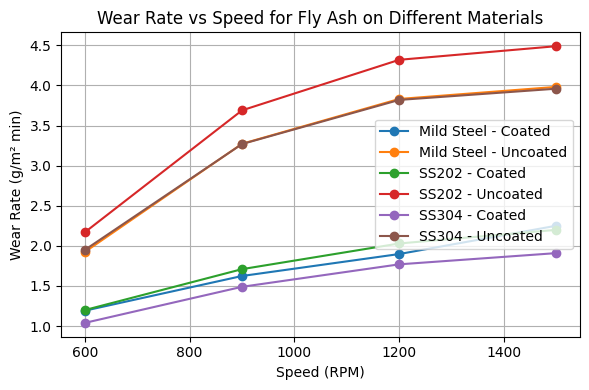

In [ ]:
# Sample data (assuming df is already defined)
sampled_data = df[df["Ash"] == "Fly"].groupby(["Material", "Coating", "Speed"]).first().reset_index()

# Plotting wear rate vs speed for each material
plt.figure(figsize=(6, 4))

materials = sampled_data["Material"].unique()  # Fixed variable assignment

for material in materials:
    material_data = sampled_data[sampled_data["Material"] == material]  # Fixed assignment operator
    for coating in material_data["Coating"].unique():  # Fixed syntax error
        coating_data = material_data[material_data["Coating"] == coating]  # Fixed assignment operator

        plt.plot(
            coating_data["Speed"],  # Fixed misplaced parenthesis
            coating_data["Wear rate"],  # Corrected column reference
            marker='o',
            label=f"{material} - {coating}"  # Fixed string formatting
        )

# Customizing the graph
plt.title("Wear Rate vs Speed for Fly Ash on Different Materials")
plt.xlabel("Speed (RPM)")
plt.ylabel("Wear Rate (g/m² min)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


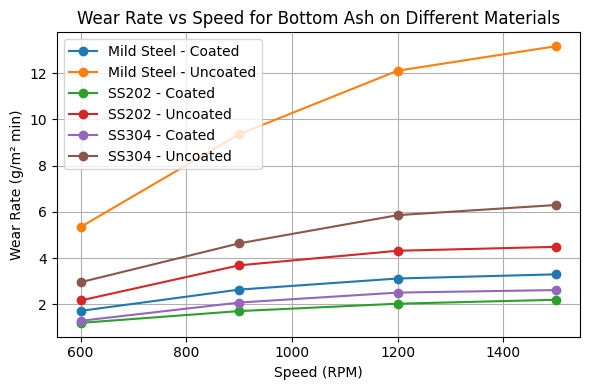

In [ ]:
# Grouping data by Material, Coating, and Speed
sampled_data = df[df["Ash"] == "Bottom"].groupby(["Material", "Coating", "Speed"]).first().reset_index()

# Plotting wear rate vs speed for each material
plt.figure(figsize=(6, 4))

materials = sampled_data["Material"].unique()

for material in materials:
    material_data = sampled_data[sampled_data["Material"] == material]
    for coating in material_data["Coating"].unique():
        coating_data = material_data[material_data["Coating"] == coating]

        plt.plot(
            coating_data["Speed"],  # X-axis
            coating_data["Wear rate"],  # Y-axis
            marker='o',
            label=f"{material} - {coating}"  # Fixed string formatting
        )

# Customizing the graph
plt.title("Wear Rate vs Speed for Bottom Ash on Different Materials")
plt.xlabel("Speed (RPM)")
plt.ylabel("Wear Rate (g/m² min)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

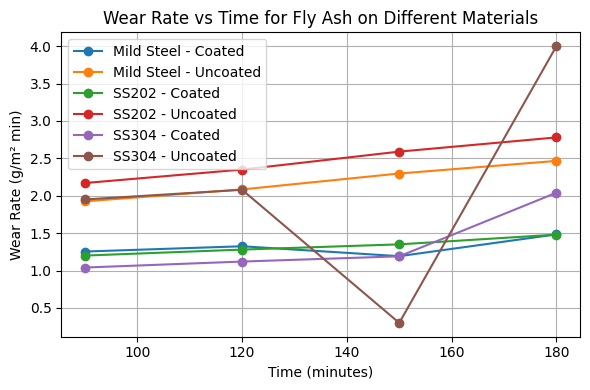

In [ ]:
# Grouping data by Material, Coating, and Time
sampled_data = df[df["Ash"] == "Fly"].groupby(["Material", "Coating", "Time"]).first().reset_index()

# Plotting erosion vs time for each material
plt.figure(figsize=(6, 4))

materials = sampled_data["Material"].unique()  # Fixed missing assignment operator

for material in materials:
    material_data = sampled_data[sampled_data["Material"] == material]
    for coating in material_data["Coating"].unique():
        coating_data = material_data[material_data["Coating"] == coating]

        plt.plot(
            coating_data["Time"],  # X-axis: Time
            coating_data["Wear rate"],  # Y-axis: Wear Rate
            marker='o',
            label=f"{material} - {coating}"  # Fixed string formatting
        )

# Customizing the graph
plt.title("Wear Rate vs Time for Fly Ash on Different Materials")
plt.xlabel("Time (minutes)")
plt.ylabel("Wear Rate (g/m² min)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


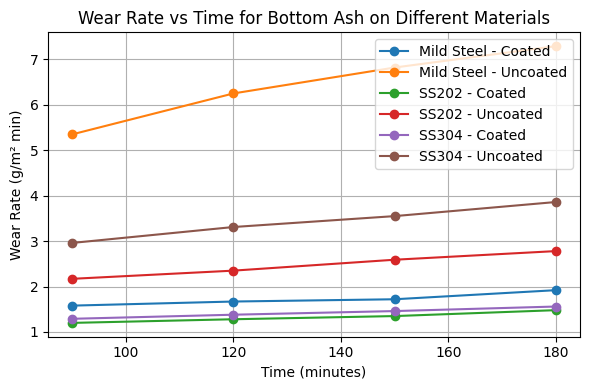

In [ ]:
# Grouping data by Material, Coating, and Time
sampled_data = df[df["Ash"] == "Bottom"].groupby(["Material", "Coating", "Time"]).first().reset_index()

# Plotting erosion vs time for each material
plt.figure(figsize=(6, 4))  # Fixed figure size

materials = sampled_data["Material"].unique()

for material in materials:
    material_data = sampled_data[sampled_data["Material"] == material]
    for coating in material_data["Coating"].unique():
        coating_data = material_data[material_data["Coating"] == coating]

        plt.plot(
            coating_data["Time"],  # X-axis: Time
            coating_data["Wear rate"],  # Y-axis: Wear Rate
            marker='o',
            label=f"{material} - {coating}"  # Fixed string formatting
        )

# Customizing the graph
plt.title("Wear Rate vs Time for Bottom Ash on Different Materials")
plt.xlabel("Time (minutes)")
plt.ylabel("Wear Rate (g/m² min)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


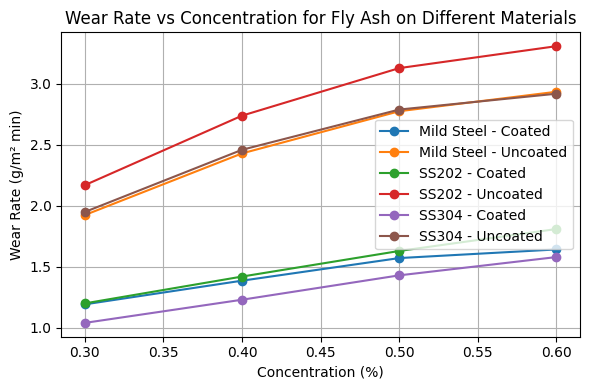

In [ ]:
# Grouping data by Material, Coating, and Concentration
sampled_data = df[df["Ash"] == "Fly"].groupby(["Material", "Coating", "Concentration"]).first().reset_index()

# Plotting wear rate vs concentration for each material
plt.figure(figsize=(6, 4))

materials = sampled_data["Material"].unique()  # Fixed missing assignment operator

for material in materials:
    material_data = sampled_data[sampled_data["Material"] == material]
    for coating in material_data["Coating"].unique():  # Fixed incorrect method syntax
        coating_data = material_data[material_data["Coating"] == coating]  # Fixed incorrect list indexing

        plt.plot(
            coating_data["Concentration"],  # X-axis: Concentration
            coating_data["Wear rate"],  # Y-axis: Wear Rate
            marker='o',
            label=f"{material} - {coating}"  # Fixed string formatting
        )

# Customizing the graph
plt.title("Wear Rate vs Concentration for Fly Ash on Different Materials")
plt.xlabel("Concentration (%)")
plt.ylabel("Wear Rate (g/m² min)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


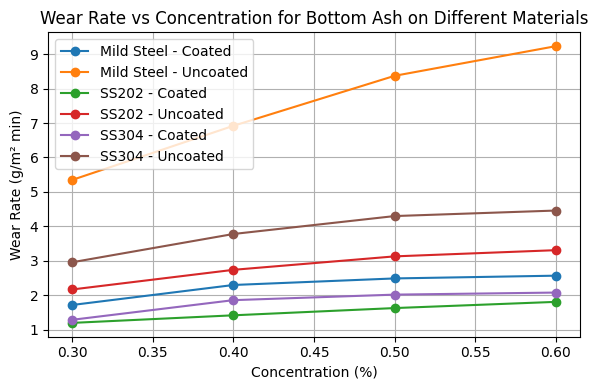

In [ ]:
# Grouping data by Material, Coating, and Concentration
sampled_data = df[df["Ash"] == "Bottom"].groupby(["Material", "Coating", "Concentration"]).first().reset_index()

# Plotting wear rate vs concentration for each material
plt.figure(figsize=(6, 4))

materials = sampled_data["Material"].unique()  # Fixed missing assignment operator

for material in materials:
    material_data = sampled_data[sampled_data["Material"] == material]
    for coating in material_data["Coating"].unique():
        coating_data = material_data[material_data["Coating"] == coating]

        plt.plot(
            coating_data["Concentration"],  # X-axis: Concentration
            coating_data["Wear rate"],  # Y-axis: Wear Rate
            marker='o',
            label=f"{material} - {coating}"  # Fixed string formatting
        )

# Customizing the graph
plt.title("Wear Rate vs Concentration for Bottom Ash on Different Materials")
plt.xlabel("Concentration (%)")
plt.ylabel("Wear Rate (g/m² min)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Encoding categorical columns if any
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.head()

,Coating,Material,Ash,Time,Concentration,Speed,Wear rate
0,1,1,1,90,0.3,600,2.17
1,1,1,1,90,0.4,600,2.74
2,1,1,1,90,0.5,600,3.13
3,1,1,1,90,0.6,600,3.31
4,1,1,1,90,0.3,900,3.69


In [ ]:
df['Coating'].value_counts()

,count
Coating,
1,384
0,384


In [ ]:
df['Material'].value_counts()

,count
Material,
1,256
0,256
2,256


In [ ]:
df['Ash'].value_counts()

,count
Ash,
1,384
0,384


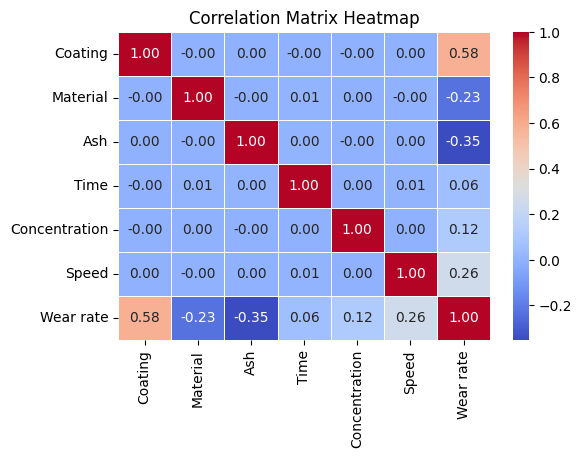

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Splitting into train & test
X = df.drop("Wear rate", axis=1)
y = df["Wear rate"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the dataset (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training & test sets
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Coating        768 non-null    int64  
 1   Material       768 non-null    int64  
 2   Ash            768 non-null    int64  
 3   Time           768 non-null    int64  
 4   Concentration  768 non-null    float64
 5   Speed          768 non-null    int64  
 6   Wear rate      768 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import numpy as np

# Define parameter grids for each model
param_grid = {
    "RandomForest": {
        "n_estimators": [50, 100, 200, 300, 500],
        "max_depth": [3, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5],
    },
    "GradientBoosting": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5],
        "subsample": [0.5, 0.7, 1.0]
    },
    "ExtraTrees": {
        "n_estimators": [50, 100, 200, 300, 500],
        "max_depth": [3, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5]
    },
    "LinearRegression": {
        # Linear Regression does not need hyperparameter tuning in this context
        # but you can add parameters like fit_intercept if needed
    },
    "Ridge": {
        "alpha": [0.1, 0.5, 1.0, 5.0, 10.0]
    },
    "Lasso": {
        "alpha": [0.01, 0.1, 1.0, 5.0, 10.0]
    },
    "ElasticNet": {
        "alpha": [0.01, 0.1, 1.0, 5.0, 10.0],
        "l1_ratio": [0.1, 0.5, 0.7, 1.0]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.5, 1.0]
    },
    "SVR": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ["linear", "rbf", "poly"],
        "epsilon": [0.01, 0.1, 0.2]
    },
    "KNN": {
        "n_neighbors": [3, 5, 10, 15],
        "weights": ["uniform", "distance"],
        "p": [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.3],
        "max_depth": [3, 5, 10, 20],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.5, 0.7, 1.0]
    },
    "StackingRegressor": {
        # For stacking, it requires more care, as we will define base models and final estimator
        "final_estimator__alpha": [0.1, 1.0, 10.0]
    }
}

# Define the models for grid search
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42),
    "StackingRegressor": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
            ('knn', KNeighborsRegressor(n_neighbors=5))
        ],
        final_estimator=Ridge()
    )
}

# Initialize best model and best score
best_model = None
best_score = -np.inf

# Loop through each model and perform GridSearchCV
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Get parameter grid for the current model
    grid = param_grid.get(model_name, None)
    if grid:
        grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
        grid_search.fit(X_train, y_train)

        # Print the best parameters for the current model
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

        # Store the best model and best score
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_model = grid_search.best_estimator_

# After GridSearchCV has completed, print the best parameters and model
print("Best Model:", best_model)
print("Best Score:", best_score)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print(f"Test Score of Best Model: {test_score}")


Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Running GridSearchCV for GradientBoosting...
Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Parameters for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.7}
Running GridSearchCV for ExtraTrees...
Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best Parameters for ExtraTrees: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Running GridSearchCV for LinearRegression...
Running GridSearchCV for Ridge...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for Ridge: {'alpha': 5.0}
Running GridSearchCV for Lasso...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Bes

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.metrics import make_scorer


# Define models with best parameters
models = {
    "RandomForest": RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_split=5, n_estimators=300, subsample=0.7, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42),
    "Ridge": Ridge(alpha=5.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.1),
    "AdaBoost": AdaBoostRegressor(learning_rate=0.5, n_estimators=50, random_state=42),
    "SVR": SVR(C=10.0, epsilon=0.1, kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=3, p=1, weights='distance'),
    "XGBoost": XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=20, n_estimators=300, subsample=0.5, random_state=42),
    "StackingRegressor": StackingRegressor(estimators=[
        ('rf', RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
        ('gb', GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_split=5, n_estimators=300, subsample=0.7))
    ], final_estimator=Ridge(alpha=0.1))
}

# Function to calculate adjusted R2 score
def adjusted_r2(X, y, model):
    r2 = r2_score(y, model.predict(X))
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Create an empty list to store results
results = []

# Evaluate models
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics calculation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_adjusted_r2 = adjusted_r2(X_train, y_train, model)
    test_adjusted_r2 = adjusted_r2(X_test, y_test, model)

    # Cross-validation accuracy (Mean score from cross-validation)
    train_cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(r2_score)).mean()
    test_cv_score = cross_val_score(model, X_test, y_test, cv=5, scoring=make_scorer(r2_score)).mean()

    # Append results to list
    results.append({
        "Model": name,
        "Train Accuracy": train_cv_score,
        "Test Accuracy": test_cv_score,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Train Adjusted R2": train_adjusted_r2,
        "Test Adjusted R2": test_adjusted_r2
    })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                Model  Train Accuracy  Test Accuracy  Train MSE  Test MSE  \
0        RandomForest        0.987610       0.971597   0.011022  0.054548   
1    GradientBoosting        0.995739       0.982045   0.000041  0.022632   
2          ExtraTrees        0.990393       0.974459   0.000007  0.054991   
3               Ridge        0.580192       0.569988   4.013872  5.484955   
4               Lasso        0.580078       0.564270   4.014099  5.486452   
5          ElasticNet        0.580171       0.564894   4.014060  5.488381   
6            AdaBoost        0.903195       0.908747   0.839821  0.886108   
7                 SVR        0.977409       0.816798   0.099730  0.266285   
8                 KNN        0.958038       0.869600   0.000007  0.223100   
9             XGBoost        0.995741       0.980525   0.000011  0.026969   
10  StackingRegressor        0.996818       0.978912   0.002374  0.023243   

    Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2   Test R2  \
0    

In [ ]:
results_df.head(11)

,Model,Train Accuracy,Test Accuracy,Train MSE,Test MSE,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,RandomForest,0.987610,0.971597,0.011022,0.054548,0.061664,0.141436,0.104985,0.233554,0.998886,0.996011,0.998875,0.995848
1,GradientBoosting,0.995739,0.982045,0.000041,0.022632,0.004292,0.082083,0.006401,0.150438,0.999996,0.998345,0.999996,0.998277
2,ExtraTrees,0.990393,0.974459,0.000007,0.054991,0.000261,0.138723,0.002707,0.234501,0.999999,0.995978,0.999999,0.995814
3,Ridge,0.580192,0.569988,4.013872,5.484955,1.350457,1.575280,2.003465,2.341998,0.594299,0.598865,0.590289,0.582493
4,Lasso,0.580078,0.564270,4.014099,5.486452,1.349289,1.572875,2.003522,2.342318,0.594276,0.598756,0.590265,0.582379
5,ElasticNet,0.580171,0.564894,4.014060,5.488381,1.349251,1.574121,2.003512,2.342729,0.594280,0.598615,0.590269,0.582232
6,AdaBoost,0.903195,0.908747,0.839821,0.886108,0.700927,0.702298,0.916417,0.941333,0.915115,0.935196,0.914276,0.932551
7,SVR,0.977409,0.816798,0.099730,0.266285,0.135649,0.219982,0.315800,0.516028,0.989920,0.980526,0.989820,0.979731
8,KNN,0.958038,0.869600,0.000007,0.223100,0.000261,0.241899,0.002707,0.472335,0.999999,0.983684,0.999999,0.983018
9,XGBoost,0.995741,0.980525,0.000011,0.026969,0.001625,0.087114,0.003362,0.164224,0.999999,0.998028,0.999999,0.997947


In [ ]:
# Sort models based on Test Accuracy (Descending order) and display top 5
top_6_models = results_df.sort_values(by="Test Accuracy", ascending=False).head(5)

# Print top 5 models
top_6_models.head(5)

,Model,Train Accuracy,Test Accuracy,Train MSE,Test MSE,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
1,GradientBoosting,0.995739,0.982045,0.000041,0.022632,0.004292,0.082083,0.006401,0.150438,0.999996,0.998345,0.999996,0.998277
9,XGBoost,0.995741,0.980525,0.000011,0.026969,0.001625,0.087114,0.003362,0.164224,0.999999,0.998028,0.999999,0.997947
10,StackingRegressor,0.996818,0.978912,0.002374,0.023243,0.028735,0.079157,0.048729,0.152456,0.999760,0.998300,0.999758,0.998231
2,ExtraTrees,0.990393,0.974459,0.000007,0.054991,0.000261,0.138723,0.002707,0.234501,0.999999,0.995978,0.999999,0.995814
0,RandomForest,0.987610,0.971597,0.011022,0.054548,0.061664,0.141436,0.104985,0.233554,0.998886,0.996011,0.998875,0.995848


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Data
data = {
    "Model": ["GradientBoosting", "XGBoost", "StackingRegressor", "ExtraTrees", "RandomForest"],
    "Train Accuracy": [0.995739, 0.995741, 0.996415, 0.990393, 0.987610],
    "Test Accuracy": [0.982045, 0.980525, 0.978764, 0.974459, 0.971597],
    "Train MSE": [0.000041, 0.000011, 0.001848, 0.000007, 0.011022],
    "Test MSE": [0.022632, 0.026969, 0.023418, 0.054991, 0.054548],
    "Train MAE": [0.004292, 0.001625, 0.025200, 0.000261, 0.061664],
    "Test MAE": [0.082083, 0.087114, 0.083195, 0.138723, 0.141436],
    "Train RMSE": [0.006401, 0.003362, 0.042994, 0.002707, 0.104985],
    "Test RMSE": [0.150438, 0.164224, 0.153030, 0.234501, 0.233554],
    "Train R2": [0.999996, 0.999999, 0.999813, 0.999999, 0.998886],
    "Test R2": [0.998345, 0.998028, 0.998287, 0.995978, 0.996011],
    "Train Adjusted R2": [0.999996, 0.999999, 0.999811, 0.999999, 0.998875],
    "Test Adjusted R2": [0.998277, 0.997947, 0.998217, 0.995814, 0.995848]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Parameters to plot
metrics = ["Train Accuracy", "Test Accuracy", "Train MSE", "Test MSE",
           "Train MAE", "Test MAE", "Train RMSE", "Test RMSE",
           "Train R2", "Test R2", "Train Adjusted R2", "Test Adjusted R2"]

# Create subplots
fig = go.Figure()

# Add traces for each metric
for metric in metrics:
    fig.add_trace(go.Bar(
        x=df["Model"],
        y=df[metric],
        name=metric
    ))

# Update layout for better visualization
fig.update_layout(
    title="Model Comparison Across Various Metrics",
    xaxis_title="Model",
    yaxis_title="Value",
    barmode='group',  # Grouped bar chart
    template="plotly_dark",  # Dark theme
    hovermode="x unified"
)

# Show the interactive plot
fig.show()


In [ ]:
!pip install plotly
from plotly.subplots import make_subplots

In [ ]:


models = {
    "GradientBoosting": GradientBoostingRegressor(
        learning_rate=0.05, max_depth=10, min_samples_split=5,
        n_estimators=300, subsample=0.7, random_state=42
    ),
    "XGBoost": XGBRegressor(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=20,
        n_estimators=300, subsample=0.5, random_state=42
    ),
    "StackingRegressor": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(
                    max_depth=10, min_samples_leaf=1, min_samples_split=2,
                    n_estimators=200, random_state=42
                )),
            ('gb', GradientBoostingRegressor(
                    learning_rate=0.05, max_depth=10, min_samples_split=5,
                    n_estimators=300, subsample=0.7, random_state=42
                ))
        ],
        final_estimator=Ridge(alpha=0.1)
    ),
    "ExtraTrees": ExtraTreesRegressor(
        max_depth=20, min_samples_leaf=1, min_samples_split=2,
        n_estimators=500, random_state=42
    ),
    "RandomForest": RandomForestRegressor(
        max_depth=10, min_samples_leaf=1, min_samples_split=2,
        n_estimators=200, random_state=42
    )
}


predictions = {}  # Dictionary to store predictions from each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# ------------------------------
#  Create Interactive Actual vs. Predicted Graphs Using Plotly
# ------------------------------
# We have 5 models so we'll arrange subplots in a grid (2 rows x 3 cols)
num_models = len(predictions)
rows = 2
cols = 3  # One subplot will remain empty

# Create subplots with a title for each model's plot.
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=list(predictions.keys())
)

# Define colors for each model's scatter points.
colors = ["red", "blue", "green", "purple", "orange"]

# Loop through each model and add its Actual vs. Predicted scatter plot.
for i, (name, y_pred) in enumerate(predictions.items()):
    # Determine subplot row and column.
    row = i // cols + 1
    col = i % cols + 1

    # Add scatter trace: Actual values (from y_test) vs. Predicted values.
    fig.add_trace(
        go.Scatter(
            x=y_test,
            y=y_pred,
            mode='markers',
            marker=dict(color=colors[i], size=6, opacity=0.7),
            name=f"{name} Predictions"
        ),
        row=row, col=col
    )

    # Add a reference line (y = x) for comparison.
    # Determine a suitable range based on the minimum and maximum of the actual and predicted values.
    y_min = min(y_test.min(), np.min(y_pred))
    y_max = max(y_test.max(), np.max(y_pred))
    fig.add_trace(
        go.Scatter(
            x=[y_min, y_max],
            y=[y_min, y_max],
            mode='lines',
            line=dict(color='black', dash='dash'),
            showlegend=False
        ),
        row=row, col=col
    )

    # Label the axes for each subplot.
    fig.update_xaxes(title_text="Actual", row=row, col=col)
    fig.update_yaxes(title_text="Predicted", row=row, col=col)

# Update overall layout.
fig.update_layout(
    title_text="Actual vs. Predicted Values for Each Model",
    height=600, width=1000,
    showlegend=False,
    hovermode="closest"
)

# Display the interactive plot.
fig.show()


In [ ]:
# Create subplots: 2 rows (Actual vs. Predicted, Residuals)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=["Actual vs. Predicted (All Models)", "Residuals (Errors) (All Models)"])

colors = ["red", "blue", "green", "purple", "orange"]  # Colors for different models

# ------------------ ACTUAL VS. PREDICTED PLOT ------------------
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)), y=y_test, mode='lines+markers',
    name="Actual", marker=dict(color='black')
), row=1, col=1)

for i, (name, y_pred) in enumerate(predictions.items()):
    fig.add_trace(go.Scatter(
        x=np.arange(len(y_test)), y=y_pred, mode='lines+markers',
        name=f"Predicted ({name})", marker=dict(color=colors[i % len(colors)])
    ), row=1, col=1)

# ------------------ RESIDUALS (ERRORS) PLOT ------------------
for i, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred  # Error = Actual - Predicted

    fig.add_trace(go.Bar(
        x=np.arange(len(y_test)), y=residuals,
        name=f"Residuals ({name})", marker=dict(color=colors[i % len(colors)])
    ), row=2, col=1)

# Layout adjustments
fig.update_layout(
    title="Error Analysis: Actual vs. Predicted & Residuals (All Models)",
    height=800, width=1000,
    showlegend=True
)

# Axis labels
fig.update_xaxes(title_text="Sample Index", row=2, col=1)
fig.update_yaxes(title_text="Wear Rate", row=1, col=1)  # For actual vs predicted
fig.update_yaxes(title_text="Residual (Error)", row=2, col=1)  # For residuals

# Show the plot
fig.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Define the models for the Voting Regressor
top_models = [
    ('GradientBoosting', GradientBoostingRegressor(
        learning_rate=0.05, max_depth=10, min_samples_split=5,
        n_estimators=300, subsample=0.7, random_state=42
    )),
    ('XGBoost', XGBRegressor(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=20,
        n_estimators=300, subsample=0.5, random_state=42
    )),
    ('StackingRegressor', StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(
                max_depth=10, min_samples_leaf=1, min_samples_split=2,
                n_estimators=200, random_state=42
            )),
            ('gb', GradientBoostingRegressor(
                learning_rate=0.05, max_depth=10, min_samples_split=5,
                n_estimators=300, subsample=0.7, random_state=42
            ))
        ],
        final_estimator=Ridge(alpha=0.1)
    )),
    ('ExtraTrees', ExtraTreesRegressor(
        max_depth=20, min_samples_leaf=1, min_samples_split=2,
        n_estimators=500, random_state=42
    )),
    ('RandomForest', RandomForestRegressor(
        max_depth=10, min_samples_leaf=1, min_samples_split=2,
        n_estimators=200, random_state=42
    ))
]

# Define the parameter grid for tuning the Voting Regressor's parameters
param_grid = {
    'weights': [[1, 1, 1, 1, 1], [0.5, 0.5, 0.5, 0.5, 0.5], [2, 2, 2, 2, 2], [1, 2, 1, 1, 1]],
    'n_jobs': [-1, 1, 2],
    'verbose': [0, 1]
}

# Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=top_models)

# Apply GridSearchCV to tune the Voting Regressor
grid_search = GridSearchCV(estimator=voting_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Parameters and Best Model
print("Best Parameters:", grid_search.best_params_)

# Get predictions from the best model
best_voting_regressor = grid_search.best_estimator_
y_pred_train = best_voting_regressor.predict(X_train)
y_pred_test = best_voting_regressor.predict(X_test)

# Calculate the evaluation metrics for Train and Test sets
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Adjusted R2 Calculation
train_adjusted_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Create a DataFrame to show the results
results = pd.DataFrame({
    "Model": ["Voting Regressor"],
    "Train Accuracy": [train_r2],
    "Test Accuracy": [test_r2],
    "Train MSE": [train_mse],
    "Test MSE": [test_mse],
    "Train MAE": [train_mae],
    "Test MAE": [test_mae],
    "Train RMSE": [train_rmse],
    "Test RMSE": [test_rmse],
    "Train R2": [train_r2],
    "Test R2": [test_r2],
    "Train Adjusted R2": [train_adjusted_r2],
    "Test Adjusted R2": [test_adjusted_r2]
})

# Display the results in a table
print(results)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best Parameters: {'n_jobs': -1, 'verbose': 0, 'weights': [1, 2, 1, 1, 1]}
              Model  Train Accuracy  Test Accuracy  Train MSE  Test MSE  \
0  Voting Regressor        0.999989       0.998189   0.000111  0.024767   

   Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2   Test R2  \
0   0.006381  0.084145    0.000111   0.024767  0.999989  0.998189   

   Train Adjusted R2  Test Adjusted R2  
0           0.999989          0.998115  


In [ ]:
results.head()

,Model,Train Accuracy,Test Accuracy,Train MSE,Test MSE,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,Voting Regressor,0.999989,0.998189,0.000111,0.024767,0.006381,0.084145,0.000111,0.024767,0.999989,0.998189,0.999989,0.998115


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get predictions from the best Voting Regressor model
y_pred_voting = voting_regressor.predict(X_test)

# ------------------------------
#  Create Interactive Plotly Graph
# ------------------------------

fig = go.Figure()

# Add scatter trace: Actual vs. Predicted values
fig.add_trace(
    go.Scatter(
        x=y_test,
        y=y_pred_voting,
        mode='markers',
        marker=dict(color='blue', size=6, opacity=0.7),
        name="Voting Regressor Predictions"
    )
)

# Add a reference line (y = x) for perfect predictions
y_min = min(y_test.min(), np.min(y_pred_voting))
y_max = max(y_test.max(), np.max(y_pred_voting))

fig.add_trace(
    go.Scatter(
        x=[y_min, y_max],
        y=[y_min, y_max],
        mode='lines',
        line=dict(color='black', dash='dash'),
        name="Ideal Predictions"
    )
)

# Update layout
fig.update_layout(
    title="Actual vs. Predicted Values (Voting Regressor)",
    xaxis_title="Actual Values",
    yaxis_title="Predicted Values",
    height=600, width=800,
    hovermode="closest"
)

# Show plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get predictions from the best Voting Regressor model
y_pred_voting = voting_regressor.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred_voting

# ------------------------------
# Create Interactive Plotly Graphs
# ------------------------------

# Create subplots (2 rows, 1 column)
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=["Actual vs. Predicted (Voting Regressor)", "Residuals vs. Sample Index"]
)

# --- Plot 1: Actual vs. Predicted ---
fig.add_trace(
    go.Scatter(
        x=np.arange(len(y_test)),  # Sample indices
        y=y_test,
        mode='lines+markers',
        marker=dict(color='black', size=4),
        name="Actual"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=np.arange(len(y_test)),
        y=y_pred_voting,
        mode='lines+markers',
        marker=dict(color='orange', size=4),
        name="Predicted (Voting Regressor)"
    ),
    row=1, col=1
)

# --- Plot 2: Residuals vs. Sample Index ---
fig.add_trace(
    go.Scatter(
        x=np.arange(len(residuals)),  # Sample indices
        y=residuals,
        mode='markers',
        marker=dict(color='blue', size=4, opacity=0.7),
        name="Residuals"
    ),
    row=2, col=1
)

# Add a zero reference line
fig.add_trace(
    go.Scatter(
        x=[0, len(residuals)],
        y=[0, 0],
        mode='lines',
        line=dict(color='black', dash='dash'),
        showlegend=False
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text="Error Analysis: Actual vs. Predicted & Residuals (Voting Regressor)",
    height=800, width=1000,
    hovermode="closest",
    showlegend=True
)

# Update axis labels
fig.update_xaxes(title_text="Sample Index", row=1, col=1)
fig.update_yaxes(title_text="Target Variable", row=1, col=1)

fig.update_xaxes(title_text="Sample Index", row=2, col=1)
fig.update_yaxes(title_text="Residual (Error)", row=2, col=1)

# Show plot
fig.show()
